In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   
print(X.shape)

(307, 2)


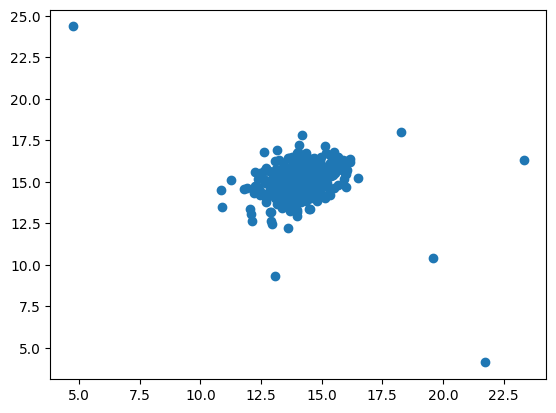

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

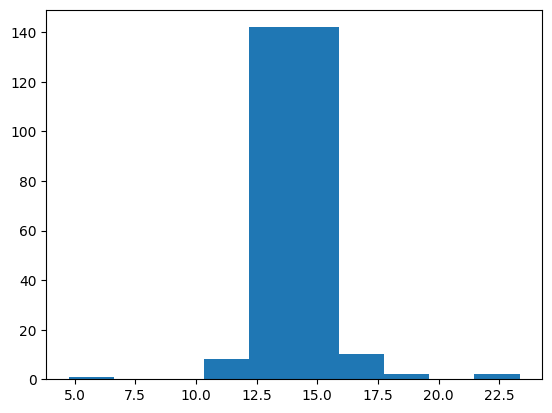

In [5]:
plt.hist(X[:,0])
plt.show()

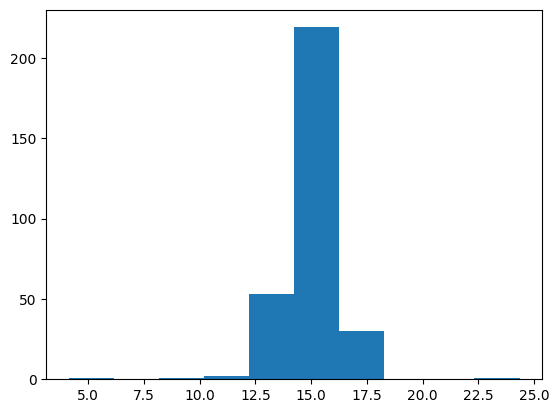

In [6]:
plt.hist(X[:,1])
plt.show()

In [10]:
def estimate_gaussian(X):  
 
    mean_values = np.mean(X, axis=0)
    variance_values = np.var(X, axis=0)
 
    return mean_values, np.sqrt(variance_values)
 
mean_values, variance_values = estimate_gaussian(X)

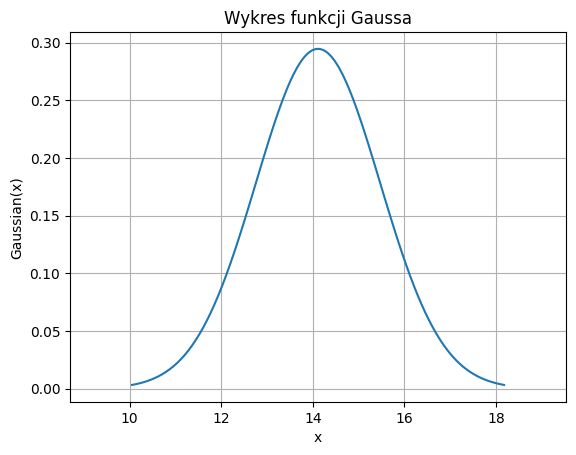

In [13]:

def gaussian(x, mu, sigma):
    return np.exp(-((x - mu)**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# Średnia i odchylenie standardowe
mu =   mean_values[0]
sigma = variance_values[0]

# Zakres x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Obliczenie wartości funkcji Gaussa dla każdego punktu x
y = gaussian(x, mu, sigma)

# Rysowanie wykresu
plt.plot(x, y)
plt.title('Wykres funkcji Gaussa')
plt.xlabel('x')
plt.ylabel('Gaussian(x)')
plt.xlim(mu - 4*sigma, mu + 4*sigma)
plt.grid(True)
plt.show()

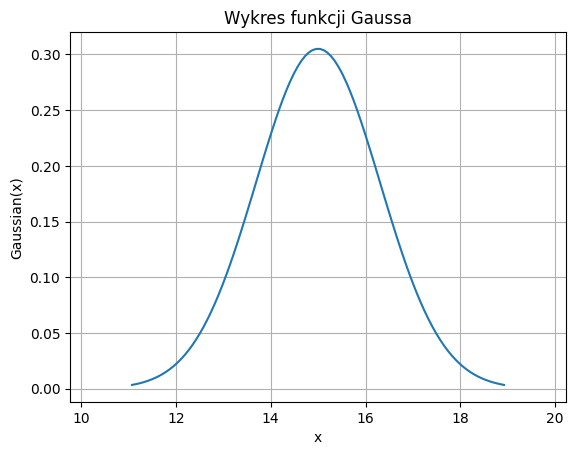

In [14]:
mu =   mean_values[1]
sigma = variance_values[1]

# Zakres x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Obliczenie wartości funkcji Gaussa dla każdego punktu x
y = gaussian(x, mu, sigma)

# Rysowanie wykresu
plt.plot(x, y)
plt.title('Wykres funkcji Gaussa')
plt.xlabel('x')
plt.ylabel('Gaussian(x)')
plt.xlim(mu - 4*sigma, mu + 4*sigma)
plt.grid(True)
plt.show()

In [18]:
Xval = data['Xval']  
yval = data['yval']

print(Xval.shape, yval.shape)

from scipy import stats

prob = stats.norm.pdf(X, loc=mean_values,scale=variance_values )
probval = stats.norm.pdf(Xval, loc=mean_values,scale=variance_values )

(307, 2) (307, 1)


In [20]:
import numpy as np
from sklearn.metrics import f1_score

def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    
    # Utwórz zakres wartości epsilon
    epsilons = np.linspace(min(pval), max(pval), num=1000)
    
    for epsilon in epsilons:
        # Przypisz etykietę na podstawie wartości gęstości prawdopodobieństwa i progu
        predictions = (pval < epsilon)
        
        # Oblicz F1-score
        f1 = f1_score(yval, predictions)
        
        # Aktualizuj najlepszy wynik F1 i próg, jeśli F1 jest większe
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    
    return best_epsilon, best_f1

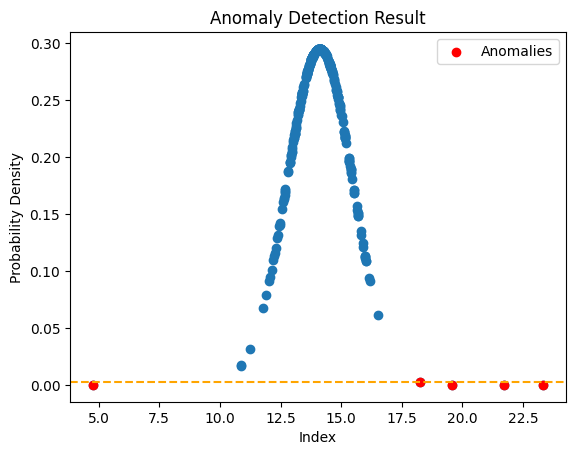

In [30]:
best_epsilon_0, best_f1_0 = select_threshold(prob[:,0], yval)

# Znajdź indeksy anomalii
anomaly_indices_0 = np.where(prob[:,0] < best_epsilon_0)[0]

# Narysuj wykres
plt.figure()
plt.scatter(X[:,0], prob[:,0])
#plt.scatter(range(len(prob[:,0])), prob[:,0], label='Data')
plt.scatter(X[:,0][anomaly_indices_0], prob[:,0][anomaly_indices_0], color='red', label='Anomalies')
plt.axhline(y=best_epsilon_0, color='orange', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Probability Density')
plt.title('Anomaly Detection Result')
plt.legend()
plt.show()

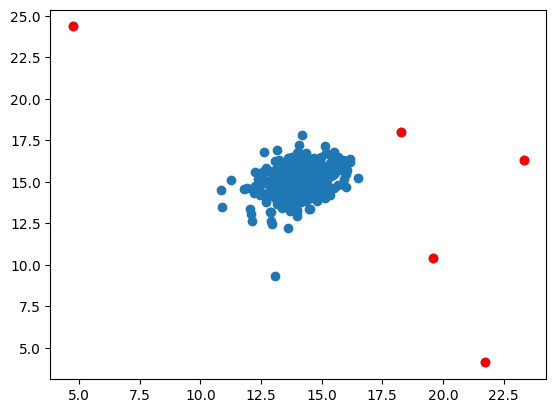

In [31]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0][anomaly_indices_0], X[:,1][anomaly_indices_0], color='red')
plt.show()

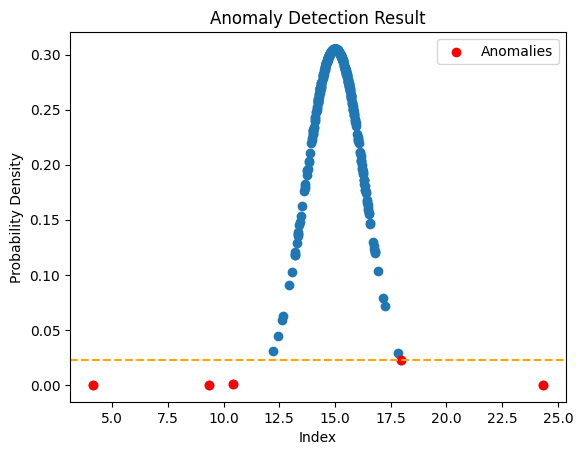

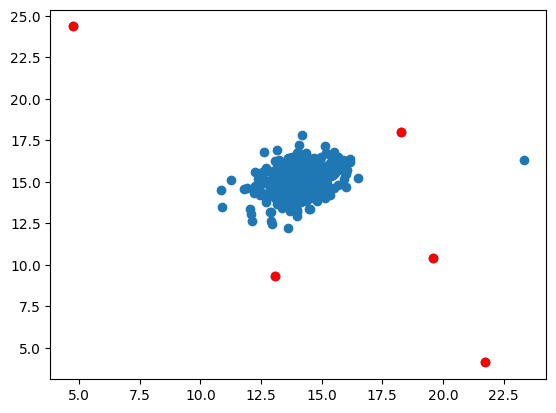

In [32]:
best_epsilon_1, best_f1_1 = select_threshold(prob[:,1], yval)

# Znajdź indeksy anomalii
anomaly_indices_1 = np.where(prob[:,1] < best_epsilon_1)[0]

# Narysuj wykres
plt.figure()
plt.scatter(X[:,1], prob[:,1])
#plt.scatter(range(len(prob[:,0])), prob[:,0], label='Data')
plt.scatter(X[:,1][anomaly_indices_1], prob[:,1][anomaly_indices_1], color='red', label='Anomalies')
plt.axhline(y=best_epsilon_1, color='orange', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Probability Density')
plt.title('Anomaly Detection Result')
plt.legend()
plt.show()

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0][anomaly_indices_1], X[:,1][anomaly_indices_1], color='red')
plt.show()

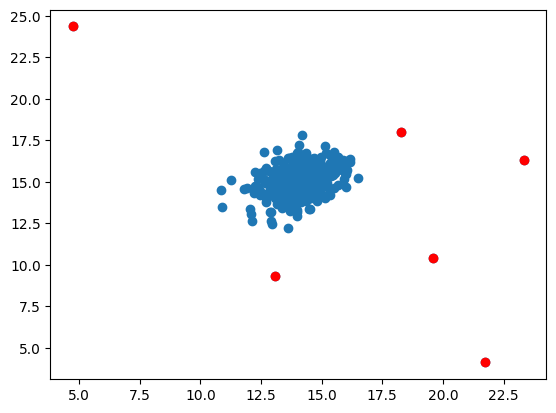

In [36]:
set1 = set(anomaly_indices_1)
set2 = set(anomaly_indices_0)

common_elements = list(set1 | set2)

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0][common_elements], X[:,1][common_elements], color='red')
plt.show()
